**LT 7**

Acot, Mark
Del Rosario, Xidy
Jayme, Jazel
Ruiz, Bonnie
Timajo, Angelo
Velante, Ven

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code.">
</form>''')

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit, GridSearchCV

import statsmodels.formula.api as sm
import statsmodels.api as stm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from scipy import stats
import scipy.stats as st
from scipy.stats import mannwhitneyu
from scipy.stats import chi2


import pylab as plot
pd.options.display.float_format = '{:,.6g}'.format
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100

# <center><span style="color:#A03C78">Health Insurance is it Worth It? - An Analysis of Medical Insurance Claims</span></center>
![](https://cdn.loanstreet.com.my/learning_articles/images/000/000/388/original/2016-04-28.jpg?1461906943)

**Highlights**
1. People who smoke cigarettes are at risk of paying more on medical charges. Similarly, people who smoke cigarettes and are obese are paying more on medical charges compared to people who are obese but non-smokers.
2. As age increases, the higher the medical charges are. Smoking cigarettes adds more to these medical charges significantly.
3. Medical charges are mainly affected by age, BMI, and if a person is smoking regardless of the region in the United States.


# 1. Background

## 1.1 Introduction
Health Insurance policies are financial instruments used as a way to cover future financial costs related to health and hospitalization. According to Investopedia, health insurance typically pays for a medical, surgical, prescription drug, and sometimes dental expenses incurred by the insured.[[1]](https://www.investopedia.com/terms/i/insurance.asp).

Health insurance policies are purchased through an insurance premium as computed by the insurance company based on a multitude of factors. Investopedia describes insurance premium as the amount of money an individual or business pays for an insurance policy.[[2]](https://www.investopedia.com/terms/i/insurance-premium.asp). Generally speaking, the insurance premium is calculated based on the following factors: age, type and amount of coverage, medical history, and other related risks [[3]](https://www.investopedia.com/ask/answers/09/calculating-premium.asp).

With the increasing relevance of insurance policies in the time of an ongoing pandemic, the researchers take a closer look at how insurance premiums can be optimized by analyzing the relationship between insurance claims and the independent variables. 

With the help of statistical methods, the group will answer the question: “What are the factors that affect the value of an insurance claim?”

## 1.2 Proponents
The main proponent of this project is the insurance firm as it is the primary party that shells out funds for any claims made by the hospital when the hospital renders service to an insurance policyholder or patient. The group recognizes the healthcare providers or hospitals as an important proponent in the industry; however, they are not directly involved in the scope of this study. 

Variables related to the insurance firm is Insurance claims (`charges`), which is the cost billed by the health insurance company, while the rest of the factors (`age`, `sex`, `bmi`, `children`, `smoker`, and  `region`) directly relate to the demographic of the patient.


## 1.3 Business Value & Objective

This project aims to optimize the insurance premium set by the insurance company based on the factors that are correlated with high insurance claims or `charges`. This way, insurance companies will be able to expand the factors considered in computing for the insurance premium based on the dataset that they have.

This study aims to test the relationship between the independent variables (`age`, `sex`, `bmi`, `children`, `smoker`, and  `region`) and the dependent variable (`charges`) through the different methods of hypothesis testing. Because the independent variables are the same factors that increase or decrease the insurance premium, the resulting relationship and degree (coefficient) of the independent variables to the dependent variable would help us arrive at the optimized insurance premium


# 2. Data

There are 1,338 medical insurance entries in our dataset. The target variable charges, are the individual medical expenses invoiced by health insurance, while the remaining columns contain personal information such as age, gender, BMI, number of children, area, and if the patient smokes. The goal is to develop a machine learning regression model that generates the target column charges more correctly.


The data is obtained from Kaggle. The link of the data is [here](https://www.kaggle.com/mirichoi0218/insurance).

**Features** 
- `age`: (int) age of primary beneficiary
- `sex`: (str) insurance contractor gender, female, male
- `bmi`: (float) Body mass index (kg / m ^ 2) 
- `children`: (int) Number of children covered by health insurance / Number of dependents
- `smoker`: (bool) 1 if smoker, else 0
- `region`: (str) the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**Target**
- `charges`: (float) Individual medical costs billed by health insurance

# 2.1 Data Cleaning and Processing

### 2.1.1 Get the data

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,"16,884.9"
1,18,male,33.77,1,no,southeast,"1,725.55"
2,28,male,33,3,no,southeast,"4,449.46"
3,33,male,22.705,0,no,northwest,"21,984.5"
4,32,male,28.88,0,no,northwest,"3,866.86"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# rename children column to num_children
df.rename(columns={'children': 'num_children'}, inplace=True)

### 2.1.2 Checking missing values

In [6]:
# checking if there are missing values
df.isna().sum()

age             0
sex             0
bmi             0
num_children    0
smoker          0
region          0
charges         0
dtype: int64

In [7]:
# checking the data types of our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   num_children  1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 2.1.3 Eliminating samples or features with missing values

No feature elimination is needed since there are no missing values.

### 2.1.4 Imputation for missing values

No data imputation is needed since there are no missing values.

# 3. EDA

For this study, we will explore our features. We will do univariate and bivariate analyses for each predictors and make inferences from it.

## 3.1 Univariate and Bivariate analyses

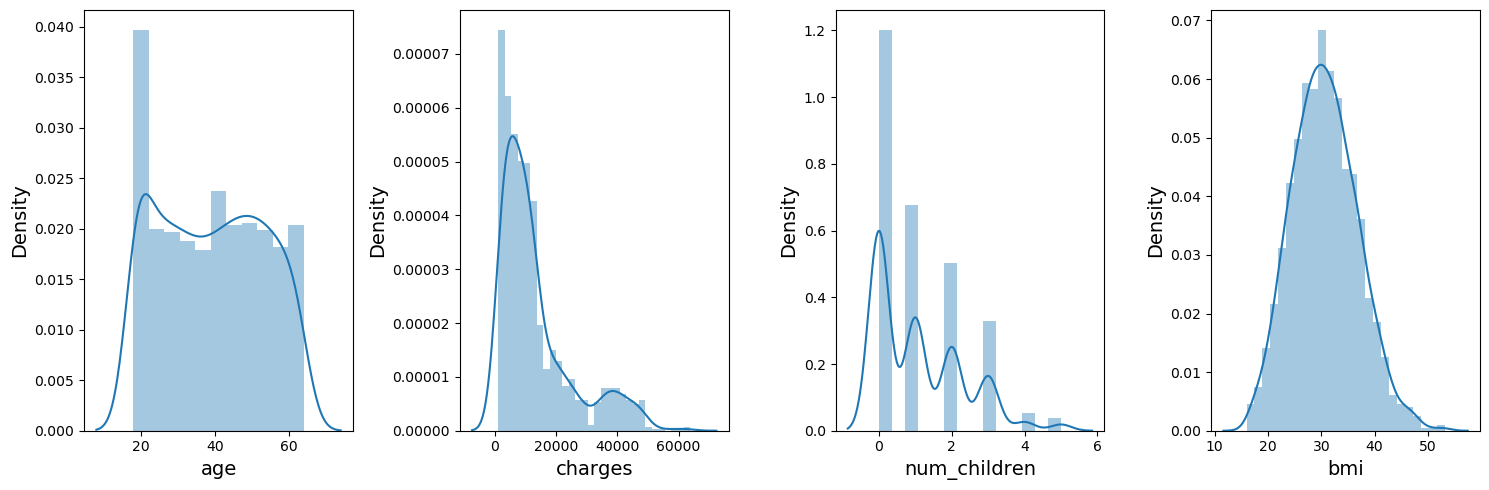

In [8]:
# Univariate analysis
# checking the distribution of numerical columns
cols = ['age', 'charges', 'num_children', 'bmi']
fig, axes = plt.subplots(1,4, figsize=(15,5))
for name, ax in zip(cols, axes.flatten()):
    sns.distplot(x=df[name], ax=ax)
    ax.set_xlabel(name, fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
plt.tight_layout()

The distribution for `charges` is right skewed. We also have imbalance samples for `num_children` greater than 3.

In [9]:
# counts for males and females
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
# Checking the number of females and males who are smokers and non-smokers
smoker_sex = pd.DataFrame(df.groupby('smoker')['sex'].value_counts(
                                                            normalize=True))
print("Rate of smokers for Males and Females")
smoker_sex.rename(columns={'sex': 'counts'})

Rate of smokers for Males and Females


counts
smoker sex            
no     female 0.514098
       male   0.485902
yes    male   0.580292
       female 0.419708

For the smoker population, 58% are males and 42% are females. For the non-smoker population, there is an insignificant difference for both genders.

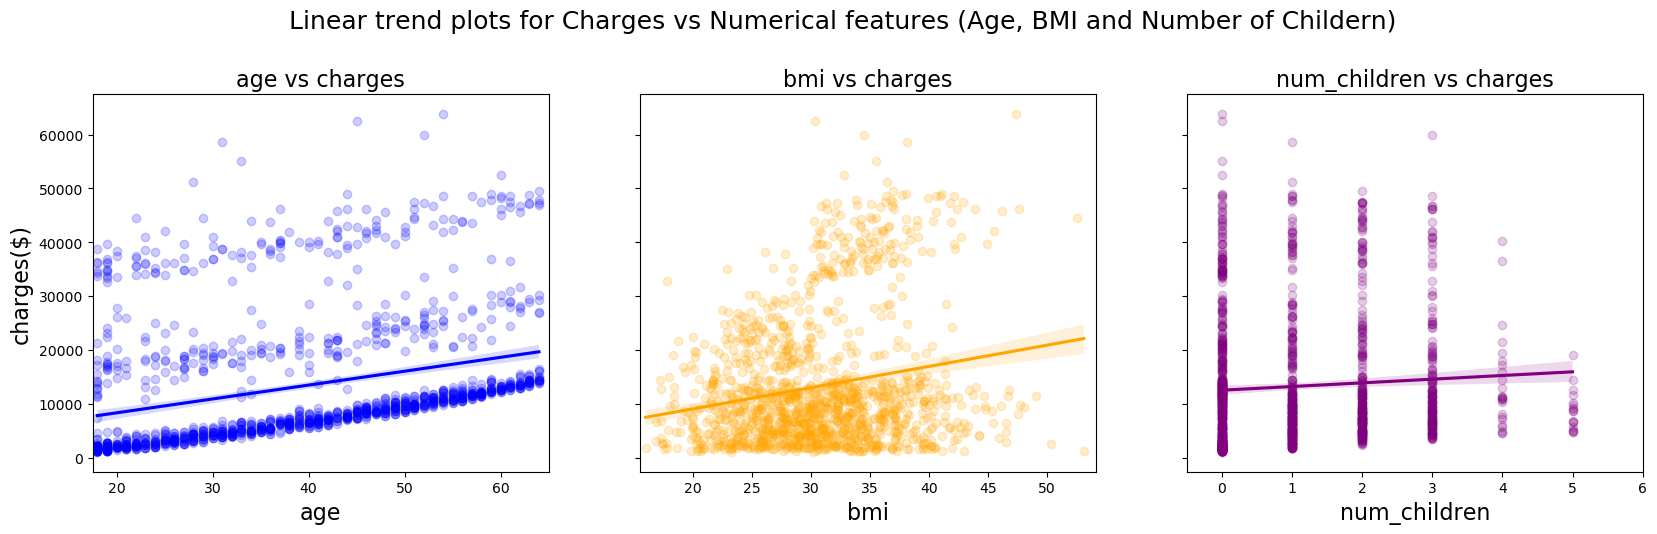

In [11]:
#Bivariate analysis.
#plotting the relationship between insurance charges and the quantitative
#variables: age, bmi, num_children

#create three sets of axes using subplots
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(20,5))

#create a custom plot for each set of axes
for item, i, color in list(zip(['age', 'bmi', 'num_children'], list(range(3)),
                               ['blue', 'orange', 'purple'])):
    sns.regplot(ax=axes[i], data=df, x=df[item], y=df['charges'], 
                scatter_kws={'alpha':0.2}, color=color)
    axes[i].set_title(item + ' vs charges', fontsize=16)
    axes[i].set_xlabel(item, fontsize=16)
    axes[i].set_xlim(df[item].min() - .5, df[item].max() + 1)
    

#make it so the 'charges' y-axis label is only on the left-most set of axes
for ax in axes.flat:
    ax.label_outer()
    
axes[0].set_ylabel('charges($)', fontsize=16)
plt.suptitle('Linear trend plots for Charges vs Numerical features '
             '(Age, BMI and Number of Childern)', fontsize=18, y=1.05)

plt.show()

Age and charges seems to have a linear relationship. The older a person gets, the higher hospital charges will be. Similar relationship can be inferred for BMI and charges. For number of children and charges, the relationship is unclear because of the imbalanced samples. We have a relatively small number of patients with 4-5 children.

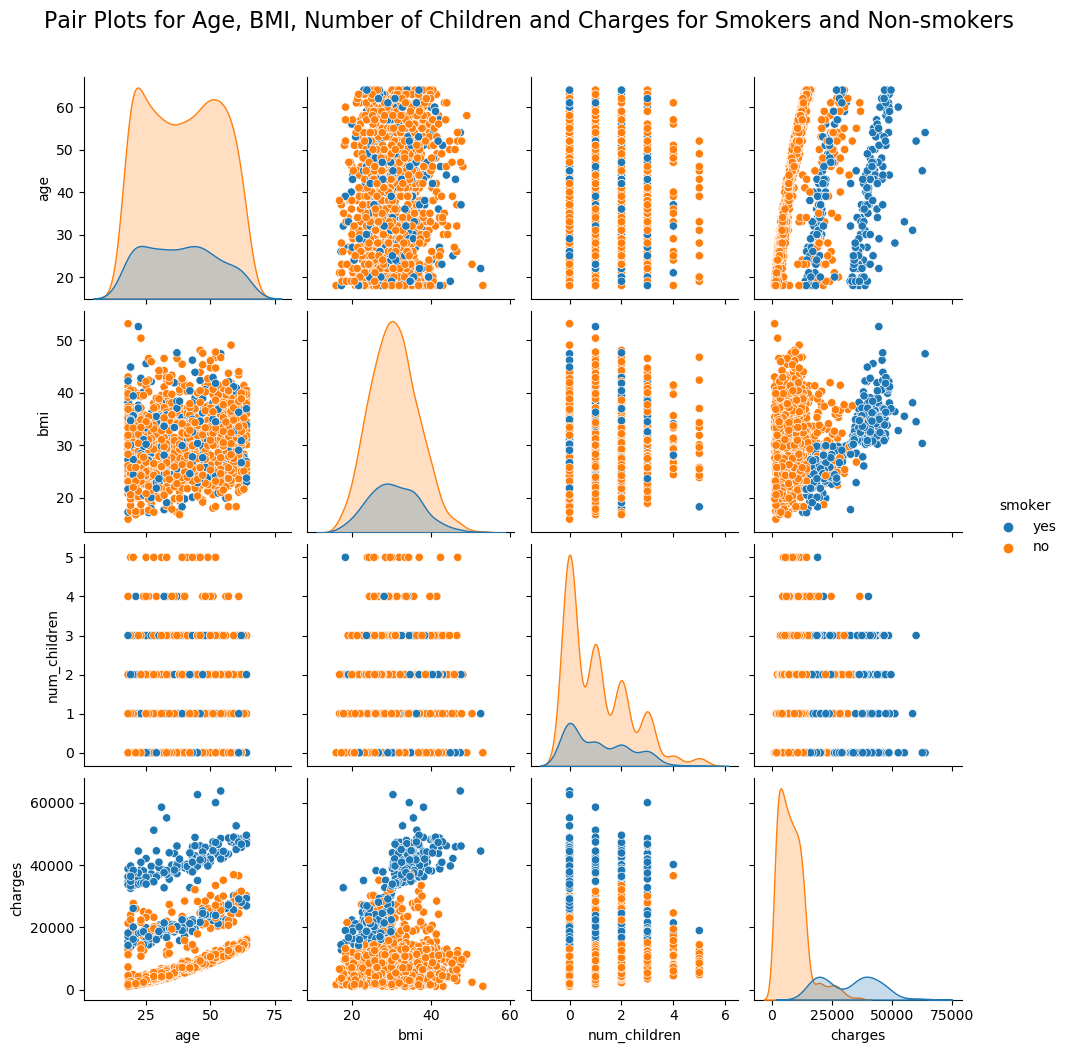

In [12]:
# Compare smoker vs non-smoker
sns.pairplot(df, vars=['age','bmi', 'num_children', 'charges'], hue='smoker')
plt.suptitle('Pair Plots for Age, BMI, Number of Children and Charges for'
             ' Smokers and Non-smokers', size=16, y=1.05);

There is definitely a correlation between smoking and medical charges (with smoking leading to higher charges). Moreover, there seems to have a clear separation between age and medical charges for smokers and non-smokers. Same observation can be said for age and bmi for smoker and non-smoker patients. Smokers with high BMI have higher medical charges. Smokers regardless of age have also higher charges compared to non-smokers.

It is interesting to look at the plot for age vs medical charges. As it can be observed, the points are clustered into three (3) groups, specifically the top (all blue points or smokers), middle (mix of blue and orange points or smokers and non-smokers), and bottom (all orange points or non-smokers). The persons belonging to the top are all smokers and have the highest historical medical charges and increases as their age increases. The persons belonging to the middle are both smokers and non-smokers where it happens that their medical charges are somewhat the same. The persons belonging to the bottom are non-smokers and have less medical charges compared to those who smokes.

Similarly, on the bmi vs medical charges, there are also top, middle, and bottom group of points. Those people that smoke and at the same time have high BMIs are prone to be charged high on medical expenses compared to those people with high BMI but do not smoke.

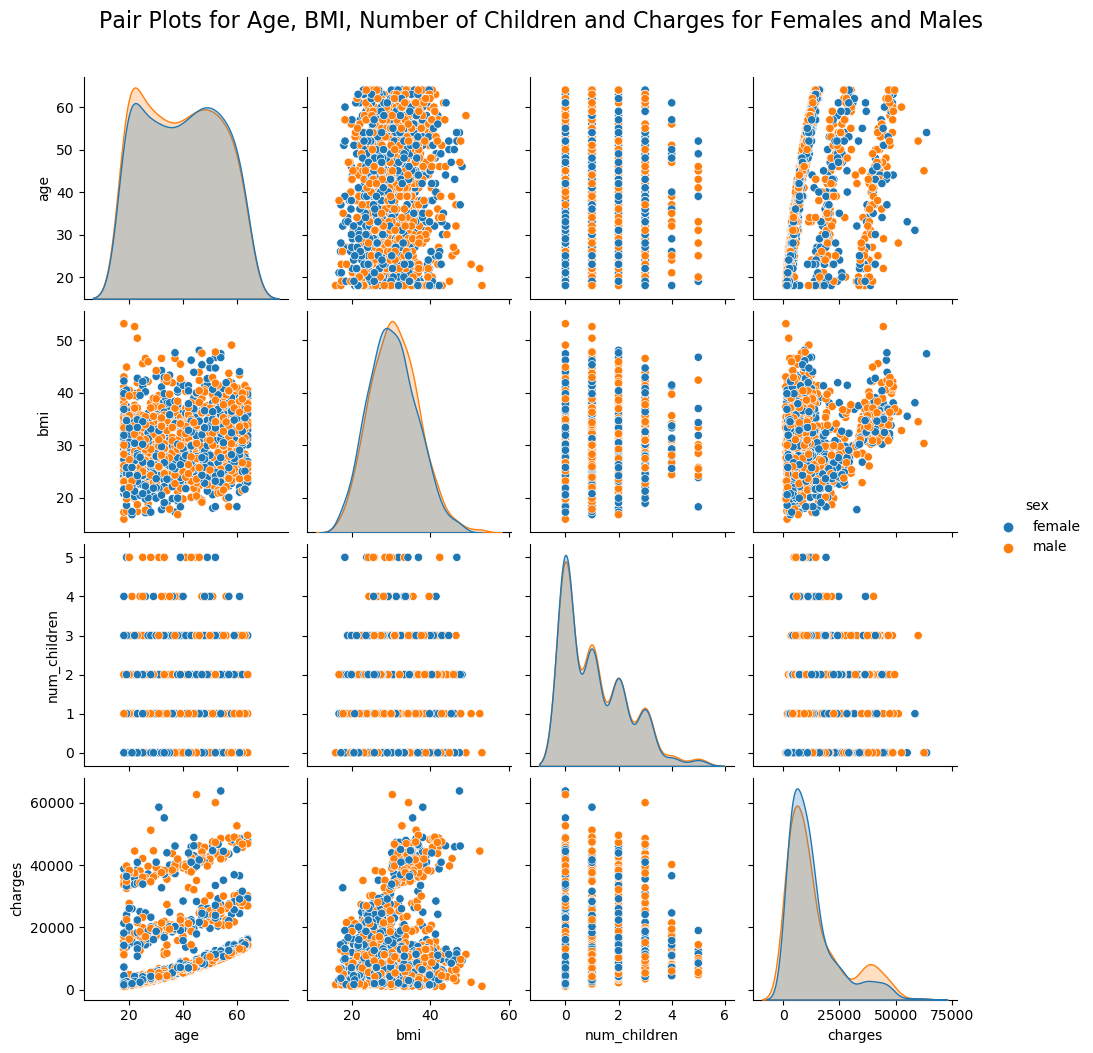

In [13]:
# Add in some of the categorical data as hues, starting with sex
sns.pairplot(df, vars=['age','bmi', 'num_children', 'charges'], hue='sex')
plt.suptitle('Pair Plots for Age, BMI, Number of Children and Charges for'
             ' Females and Males', size=16, y=1.05);

However, no clear correlation is seen between BMI and charges for males and females. Similarly, no clear relationship can be seen between age and charges for both genders (samples are scattered for males and females). It seems that gender does not affect charges.

In [14]:
print("Basic Statistics of the patients' medical charges per Region")
df.groupby('region')['charges'].describe()

Basic Statistics of the patients' medical charges per Region


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324,"13,406.4","11,255.8","1,694.8","5,194.32","10,057.7","16,687.4","58,571.1"
northwest,325,"12,417.6","11,072.3","1,621.34","4,719.74","8,965.8","14,711.7","60,021.4"
southeast,364,"14,735.4","13,971.1","1,121.87","4,440.89","9,294.13","19,526.3","63,770.4"
southwest,325,"12,346.9","11,557.2","1,241.57","4,751.07","8,798.59","13,462.5","52,590.8"


It seems that patients residing in the Southeast have higher charges on average.

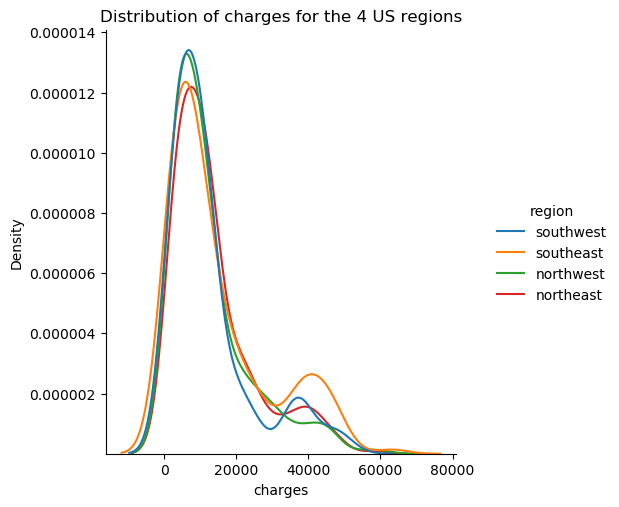

In [15]:
sns.displot(df, x='charges', hue='region', kind='kde')
plt.title('Distribution of charges for the 4 US regions');

As shown in the plot above, there is very minimal difference in the medical charges for the 4 US regions.

In [16]:
df_dummy = pd.get_dummies(df[['sex', 'smoker', 'region']],drop_first = True )
df_ = df.drop(['sex', 'smoker', 'region'], axis=1)
df_cleaned = pd.merge(df_, df_dummy, left_index=True, right_index=True)

## 3.2 Hypothesis Testing

For us to be able to determine the features that impacts the medical charges, a series of hypotheses testing were conducted. These hypotheses tests are Chi-Square, Mann-Whitney U, Kruskal Wallis, and Friedman tests. For all these tests, we set our level of significance to $\alpha=0.05$.

### 3.2.1 Correlation between pairs of features

Below is the correlation between every pair of feature (independent variable) and dependent variable `charges`, and visualization of the Pearson correlations using a heatmap.

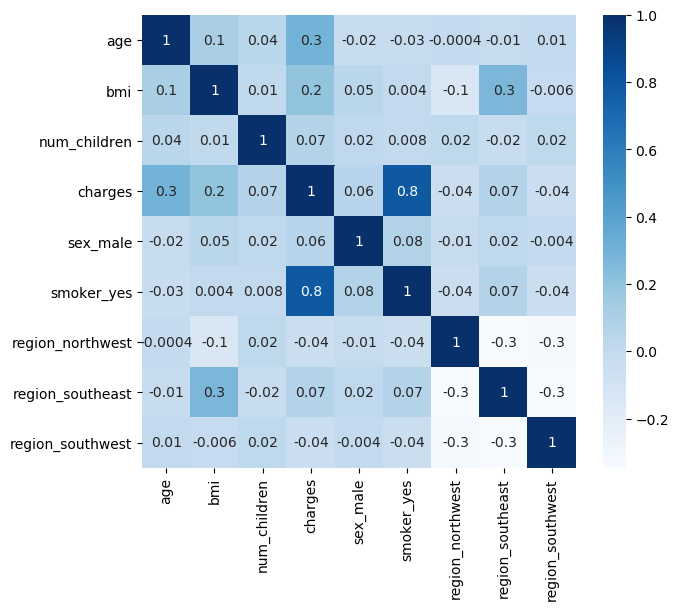

In [17]:
# Show correlation plot of all variables
plt.figure(figsize=(7,6))
sns.heatmap(data=df_cleaned.corr(method='pearson'),
            cmap="Blues", annot=True, fmt=".1g")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() #
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

The correlation plot shows that smoking is correlated with charges.
There is not much correlation between the majority of the independent variables. The main variables to keep an eye on when running the regression are and BMI & region (BMI is slightly correlated with the North-West & South-East regions).

### 3.2.1a Chi-Square Test for Test of Independence

The Chi-Square statistic is commonly used for testing relationships between categorical variables. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

H0: There is no association between gender and smoking habit.\
H1: There is an association between gender and smoking habit.

Generally, men tend to use all tobacco products at higher rates than women [[4](https://www.drugabuse.gov/node/1363)]. Here we are performing Chi-Square test for categorical variables `smoker_yes` and `sex_male` to test if they are independent.

In [18]:
#Generating Contigency Table for smoker and sex.
df1 = df_cleaned[['smoker_yes','sex_male']]
tab1 = pd.crosstab(df1['smoker_yes'], df1['sex_male'])
print(tab1)

sex_male      0    1
smoker_yes          
0           547  517
1           115  159


In [19]:
stat, p, dof, expected = st.chi2_contingency(tab1)
print('dof = %f' % dof)
print('p-value = %f' % p)
print('stats = %f' % stat)

dof = 1.000000
p-value = 0.006548
stats = 7.392911


Our p-value is 0.006548, which is smaller than our alpha. Hence, we reject the null hypothesis that smoker and sex are independent. In our data, males are predominantly smokers.

### 3.2.2  Mann-Whitney U test (Wilcoxon Rank Sum Test)

To quantify the difference between the means of the two samples, we will use Mann-Whitney U test. An underlying assumption for appropriate use of the test is that the continuous outcome is approximately normally distributed or that the samples were sufficiently large (usually `n1`> 30 and `n2`> 30) to justify its use based on the Central Limit Theorem. When comparing two independent samples when the outcome is not normally distributed, the homogeneity of variance is violated, and the samples are small, a nonparametric test is appropriate.

**Smokers' charges vs Non-smoker's charges**

From our initial exploration on section $3.1$, we've observed that smokers tend to have higher charges compared to non-smokers. We wanted to investigate if the difference between the medical charges of smokers and non-smokers is not by random chance. Our hypotheses are:

H0: There is no significant difference in the charges between smokers and non-smokers.\
H1: There is a significant difference in the charges between the smokers and non-smokers.

One of the assumptions of a valid t-test is the homogeneity of variance. We use Bartlett's test to check homogeneity assumption.

<b>Bartlett's Hypotheses:</b>\
$H0_b$: The variances are equal across all samples/groups\
$H1_b$:  the variances are not equal across all samples/groups

In [20]:
from scipy.stats import bartlett
# subsetting the data:

df_smoker = df_cleaned[df_cleaned['smoker_yes'] == 1]
df_nonsmoker = df_cleaned[df_cleaned['smoker_yes'] == 0]

# test for homogeneity of variance
stat, p = bartlett(df_nonsmoker['charges'], df_smoker['charges'])
# Get the results:
print("The p-value for Bartlett's Hypothesis is", p)
print("Is the p-value less than the level of significance?", p < 0.05)

The p-value for Bartlett's Hypothesis is 5.06089742139399e-52
Is the p-value less than the level of significance? True


If we get a p-value larger than 0.05 we can assume that our data is heteroscedastic and we can continue carrying out a parametric test such as the two-sample t-test. However, in our case p-value is extremely small. Thus, to get a statistically significant result we will carry out the *Mann-Whitney U test*.

In [21]:
df_smoker = df_cleaned[df_cleaned['smoker_yes'] == 1]
df_nonsmoker = df_cleaned[df_cleaned['smoker_yes'] == 0]
print('Number of smokers:', df_smoker.shape[0]) 
print('Number of non-smokers:', df_nonsmoker.shape[0]) 
df_nonsmoker = df_nonsmoker.sample(n=274, random_state=10)

Number of smokers: 274
Number of non-smokers: 1064


We have 1,064 nonsmokers in our dataset and 274 smokers. Since statistical power is reduced as the difference in sample sizes increases [[6](https://stats.stackexchange.com/questions/40342/mann-whitney-u-test-with-unequal-sample-sizes)], we chose to balance our samples using random selection and perform the Mann-Whitney U test on the two groups.

In [22]:
mannwhitneyu(df_smoker.charges, df_nonsmoker.charges)

MannwhitneyuResult(statistic=72297.0, pvalue=1.765263120903572e-78)

The p-value $1.7e-78$ is less than the level of significance which is 0.05. Thus, we reject our H0. We reject the idea that there is no difference in charges between smokers and non-smokers. Smokers really do have higher medical charges compared to non-smokers.

**Medical Charges of Obese vs Medical Charges of Non-obese**

We also want to investigate if there is significant difference between the mean charges of the obese people BMI >= 30 and the more fit individuals with BMI < 30. 

Our hyptheses are:\
H0: There is no significant difference in the charges between patients who are obese and not obese.\
H1: There is a significant difference in the charges between patients with low BMI and patients with a high BMI.

In [23]:
obese = df_cleaned.loc[df_cleaned['bmi'] >= 30]
nonobese = df_cleaned.loc[df_cleaned['bmi'] < 30]

# test for homogeneity of variance
stat, p = bartlett(obese['charges'], nonobese['charges'])
# Get the results:
print("The p-value for Bartlett's Hypothesis is", p)
print("Is the p-value less than the level of significance?", p < 0.05)

The p-value for Bartlett's Hypothesis is 6.519366598491225e-53
Is the p-value less than the level of significance? True


Again for this case, we will carry out the Mann-Whitney U test.

In [24]:
print('Number of obese people:', obese.shape[0]) 
print('Number of non-obese people:', nonobese.shape[0]) 

Number of obese people: 707
Number of non-obese people: 631


We chose to balance our samples using random selection and perform the Mann-Whitney U test on the two groups.

In [25]:
# select 631 samples to balance sample sizes
obese = obese.sample(n=631, random_state=0)

# perform Mann-Whitney U test
mannwhitneyu(nonobese.charges, obese.charges)

MannwhitneyuResult(statistic=169718.0, pvalue=5.741017980998653e-06)

The p-value $5.7e-06$ is less than the level of significance which is 0.05. Thus, we reject our H0. We reject the idea that there is no difference in charges between obese and not obese.

**Medical charges of Obese+Smokers vs Medical charges of Obese+Non-Smokers**

We noticed from our initial exploration, that people who are obese and smoking have higher medical charges compared to obese but not smoking population. We want to know if the difference between the annual charges of the obese population with smoking habits and obese but non-smoker are not due to random chance. Here are our hypotheses:

H0: There is no significant difference in the charges between obese with smoking habits and obese with no smoking habit.\
H1: There is a significant difference in the charges between obese with smoking habits and obese with no smoking habit.

In [26]:
obese_smoker = obese[obese['smoker_yes'] ==1]
obese_nonsmoker = obese[obese['smoker_yes'] ==0]
print('Number of obese and smoker people:', obese_smoker.shape[0]) 
print('Number of obese and non-smoker:', obese_nonsmoker.shape[0]) 

Number of obese and smoker people: 136
Number of obese and non-smoker: 495


In [27]:
# select 136 samples
obese_nonsmoker = obese_nonsmoker.sample(n= 136, random_state=10)
mannwhitneyu(obese_nonsmoker.charges, obese_smoker.charges)

MannwhitneyuResult(statistic=38.0, pvalue=9.518024753376768e-46)

The p-value $9.5e-46$  is less than the level of significance which is 0.05. Thus, we reject our H0. We reject the idea that there is no significant difference in the charges between obese with smoking habits and obese with no smoking habit.
This analysis proves that being a smoker and obese really tends to increase individual's medical charges [[5](https://pubmed.ncbi.nlm.nih.gov/1468844/)].

**Medical charges among younger vs Medical charges among older population**

We also want to know if there is a difference between the annual charges of the younger population (age < 39 yrs old) and older population. Here are our hypotheses:

H0: There is no significant difference in the charges between younger and older individuals.\
H1: There is a significant difference in the charges between younger and older individuals.

In [28]:
age_median = df_cleaned['age'].median()
older_group = df_cleaned[df_cleaned['age'] >= age_median]
younger_group = df_cleaned[df_cleaned['age'] < age_median]
print('Number of younger people:', younger_group.shape[0]) 
print('Number of older people:', older_group.shape[0]) 

Number of younger people: 649
Number of older people: 689


We have 689 number of people with ages above the median in our dataset and 649 who are lower than the median age. We chose to balance our samples using random selection and perform the Mann-Whitney U test on the two groups.

In [29]:
# select 649 samples
older_group = older_group.sample(n= 649, random_state=10)

In [30]:
mannwhitneyu(younger_group.charges, older_group.charges)

MannwhitneyuResult(statistic=97441.0, pvalue=4.923491272279219e-63)

The p-value $4.9e-63$ is less than the level of significance which is 0.05. Thus, we reject our H0. We reject the idea that there is no difference in charges between younger and older individuals.

### 3.2.3 Kruskal Wallis test

#### Checking the Variances of Region and Charges

Before comparing if there is a significant difference across regions and medical charges, bartlett test will be used to determine if their is indeed a homogeneity of variances.

H0: the variances are equal across all samples/groups

H1:  the variances are not equal across all samples/groups

In [31]:
from scipy.stats import bartlett
# subsetting the data:
r1 = df[df['region']=='southwest']['charges']
r2 = df[df['region']=='southeast']['charges']
r3 = df[df['region']=='northwest']['charges']
r4 = df[df['region']=='northeast']['charges']
# Bartlett's test in Python with SciPy:
stat, p = bartlett(r1, r2, r3, r4)
# Get the results:
print('p-value is:', p)


p-value is: 1.0092988086670753e-05


Since the p-value is lower than the level of significance of 0.05, therefore the null hypothesis is rejected. The variances are not equal across all samples/groups. In this case, we will use a non-parametric test that is equivalent of ANOVA to determine whether or not two or more groups have the same population mean. The non-parametric test to be used is Kruskal-Wallis.

The **Kruskal Wallis test** is the nonparametric counterpart to the One Way ANOVA. The term "non parametric" refers to a test that does not presume your data comes from a certain distribution. When the assumptions for ANOVA are not satisfied, the H test is performed (like the assumption of normality). It is also known as the one-way ANOVA on ranks since the test uses the rankings of the data values rather than the actual data points [[7](https://www.statisticshowto.com/kruskal-wallis/)]

**Differences in the charges for different regions.**

In this hypothesis test, we will determine the effects of the 4 different regions in the United States with regard to the medical charges the patients have incurred.

H0: There is no significant difference in the charges across regions.\
H1: There is a significant difference in the charges across regions.

The hospital charges in this data can be categorized per region in the United States, which are Southwest, Southeast, Northwest, and Northeast. These groups are homogenous based on eyeballing the distribution of charges for the 4 US regions.


In [32]:
size_mapping = {
'southwest': 3,
'southeast': 2,
'northwest': 1,
'northeast': 0}
df1 = df.copy()
df1['region'] = df1['region'].map(size_mapping)
region = df1['region'].to_numpy()
charges = df1['charges'].to_numpy()

stats.kruskal(region, charges)

KruskalResult(statistic=2022.1737247255996, pvalue=0.0)

The p-value (0.0) is less than the level of significance which is 0.05. Thus, we reject our H0. We can say that there is *some* statistically significant difference somewhere in the groups.

To test further if the result for the Kruskal-Wallis test is valid, Friedman test or the version of a repeated one-way ANOVA will be used. This is to measure the differences across groups considering a covariate.

### 3.2.4 Friedman Test

The Friedman test is a non-parametric substitute for one-way ANOVA with repeated measurements. When the dependent variable being measured is ordinal, it is utilized to test for differences across groups. It may also be used for continuous data that deviates from the assumptions required to conduct the one-way ANOVA with repeated measurements (e.g., data that has marked deviations from normality). The Friedman test is a non-parametric substitute for one-way ANOVA with repeated measurements [[8](https://statistics.laerd.com/spss-tutorials/friedman-test-using-spss-statistics.php)]

In the implementation of Friedman test, the library pingouin was used.

In [33]:
#!pip install pingouin
from pingouin import friedman

In [34]:
df2 = df.copy()
df2['obese'] = (df2['bmi'] >= 30).astype(int)
age_median = df2['age'].mean()
df2['older'] = (df2['age'] >= age_median).astype(int)
size_mapping = {'yes': 1, 'no': 0}
df2['smoker'] = df2['smoker'].map(size_mapping)

#### Differences of the medical charges across regions with age as a covariate

H0: There is no significant difference in the charges across regions with age as a covariatet.\
H1: There is a significant difference in the charges across regions with age as a covariate.


In [35]:
friedman(data=df2, dv='charges', within='region',
         subject='older')

,Source,W,ddof1,Q,p-unc
Friedman,region,0.7,3,4.2,0.240662


With age as the covariate, the p-value (p-unc/uncorrected p_value) of region which is 0.240662 is higher than the level of significance of 0.05. In this case, we accept the null hypothesis. There is no significant difference in the charges across regions with age as a covariate. The Kruskal-Wallis result is invalid.

#### Differences of the medical charges across regions with smoking habit as a covariate

H0: There is no significant difference in the charges across regions with smoking habit as a covariate. \
H1: There is a significant difference in the charges across regions with smoking habit as a covariate.

In [36]:
friedman(data=df2, dv='charges', within='region',
         subject='smoker')

,Source,W,ddof1,Q,p-unc
Friedman,region,0.1,3,0.6,0.896432


With smoking habit as the covariate, the p-value (p-unc/uncorrected p_value) of region which is 0.896 is higher than the level of significance of 0.05. In this case, we accept the null hypothesis. There is no significant difference in the charges across regions with smoking habit as a covariate. Again, the Kruskal-Wallis result is invalid.

#### Differences of the medical charges across regions with obesity as a covariate

H0: There is no significant difference in the charges across regions with being obese as a covariate.\
H1: There is a significant difference in the charges across regions with being obese as a covariate.

In [37]:
friedman(data=df2, dv='charges', within='region',
         subject='obese')

,Source,W,ddof1,Q,p-unc
Friedman,region,0.8,3,4.8,0.187042


With BMI as the covariate variable, the p-value (p-unc/uncorrected p_value) of region which is 0.187042 is higher than the level of significance of 0.05. In this case, we accept the null hypothesis. There is no significant difference in the charges across regions with being obese as a covariate. The Kruskal-Wallis result is invalid.

Considering the covariates used above, it can be posited that the means of the medical charges between each regions have no significant difference.

### Summary of Hypothesis Testing

The purpose of conducting these hypotheses tests is to determine the features that impacts the medical charges by comparing the mean difference of the groups.

For the Chi-Square test, it was found out that there is an association between gender and smoking habit.

For Mann-Whitney U test the results are:

- There is a significant difference in the medical charges between Smokers' charges vs Non-smoker's charges.
- There is a significant difference in the medical charges between patients with low BMI and patients with a high BMI.
- There is a significant difference in the medical charges between younger and older individuals.

For Kruskal Wallis test, it was observed that there is a significant difference in the medical charges between regions. But analyzing further by adding the impacts of continuous variables that are not of main interest using Friedman Test, it was posited that there is really no significant difference in the medical charges between the 4 regions in the United States.

## 3.3 Multiple linear regression modeling

One of the most common methods used to define this relationship is called Ordinary Least Square (OLS). This method minimizes the sum of squared residuals - the difference between the observed and actual dependent variable values squared. One of the key indicators of how well the resultant model explains the relationship between the variables is the R-Squared value. This value describes the percent variation in the dependent variable that is explained by the independent variable(s); the higher the R-Squared value the better. Linear Regression will be used to determine the relationship of all the variables with charges. By fitting a linear equation to observed data, it seeks to model the connection between two variables [[9](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)]

In this section, we will determine the effects of the combined independent variables to the medical charges.

In [38]:
df_cleaned[['smoker_yes', 'sex_male', 'region_northwest',
                   'region_southeast', 'region_southwest', 'bmi', 'age',
                  'num_children']].head(2)

,smoker_yes,sex_male,region_northwest,region_southeast,region_southwest,bmi,age,num_children
0,1,0,0,0,1,27.9,19,0
1,0,1,0,1,0,33.77,18,1


In [39]:
# Create a function to run the OLS linear regression for
# each independent variable
def do_ols(df, x, y):
    formula = y + ' ~ ' + x
    results = sm.ols(formula=formula, data=df).fit()
    return results, formula

def compute_r2(independent_var, var=['age', 'bmi']):
    results_dict = {}
    for i in range(len(independent_var)):
        model_variables = '+'.join(var+[independent_var[i]])
        vars_ = (np.unique(model_variables.split('+')))
        if len(vars_) > 1:
            if vars_[0] == '':
                model_variables = vars_[1]
            model_variables = '+'.join(np.unique(model_variables.split('+')))
            results, formula = do_ols(df_cleaned, model_variables, 'charges')
            results_dict[formula] = results.rsquared

    df_rsquared = pd.DataFrame.from_dict(results_dict, orient='index'
                                    ).reset_index()
    df_rsquared.rename(columns= {'index': 'formula', 0:'R^2'}, inplace=True)
    return df_rsquared

In [40]:
independent_var = ['smoker_yes', 'sex_male', 'region_northwest',
                   'region_southeast', 'region_southwest', 'bmi', 'age',
                  'num_children']

In [41]:
print("These are the identified independent variables that affects the medical charges:\n\n", independent_var)

These are the identified independent variables that affects the medical charges:

 ['smoker_yes', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest', 'bmi', 'age', 'num_children']


The OLS method will be used to further refine our list of variables that appear to have a correlation to charges. Each variable is examined independently first, then in combinations.

In [42]:
print('Effects of Independent Variables to the medical charges')
display(compute_r2(independent_var, var=['']))

Effects of Independent Variables to the medical charges


,formula,R^2
0,charges ~ smoker_yes,0.619765
1,charges ~ sex_male,0.00328238
2,charges ~ region_northwest,0.0015924
3,charges ~ region_southeast,0.00547327
4,charges ~ region_southwest,0.00186711
5,charges ~ bmi,0.0393391
6,charges ~ age,0.0894059
7,charges ~ num_children,0.00462376


The linear regression model clearly shows that the `smoker_yes` variable has the largest impact on the dependent variable `charges`. It influences the medical charges by 61.98% independently. Surprisingly, BMI and age has a little influence over the medical charges by around 3.93% and 8.94% respectively.

Looking at the `4 regions` as in the analysis from Friedman test, we prove that region of residence doesn't provide a strong influence over the medical charges. Since `smoker_yes` has the largest impact, we therefore take this forward to the next step. We will add another variable from this iteration.

In [43]:
print('Effects of combining the independent variables smoker_yes and age to the medical charges')
display(compute_r2(independent_var, var=['smoker_yes', 'age']))

Effects of combining the independent variables smoker_yes and age to the medical charges


,formula,R^2
0,charges ~ age+smoker_yes,0.721401
1,charges ~ age+sex_male+smoker_yes,0.721412
2,charges ~ age+region_northwest+smoker_yes,0.721509
3,charges ~ age+region_southeast+smoker_yes,0.721943
4,charges ~ age+region_southwest+smoker_yes,0.721691
5,charges ~ age+bmi+smoker_yes,0.747477
6,charges ~ age+num_children+smoker_yes,0.723743


This next step of the analysis shows that the `age` variable has the greatest impact on R-Squared, increasing from 62% to 72.1%. We therefore take this forward to the next step, along with the `smoker_yes` variable.

In [44]:
print('Effects of combining the independent variables smoker_yes, age, and BMI to the medical charges')
compute_r2(independent_var, var=['smoker_yes', 'age', 'bmi'])

Effects of combining the independent variables smoker_yes, age, and BMI to the medical charges


,formula,R^2
0,charges ~ age+bmi+smoker_yes,0.747477
1,charges ~ age+bmi+sex_male+smoker_yes,0.747497
2,charges ~ age+bmi+region_northwest+smoker_yes,0.747616
3,charges ~ age+bmi+region_southeast+smoker_yes,0.747946
4,charges ~ age+bmi+region_southwest+smoker_yes,0.74773
5,charges ~ age+bmi+num_children+smoker_yes,0.749695


 Combining `smoker_yes`, `age`, and `bmi` increased R-Squared to 74.75%. However, it can be found that adding another variable `num_children` increased its influence on the effects to medical charges to 74.97%. At this step, the increases in R-Squared are very minor.

In [45]:
compute_r2(independent_var, var=['smoker_yes', 'age', 'bmi', 'num_children'])

,formula,R^2
0,charges ~ age+bmi+num_children+smoker_yes,0.749695
1,charges ~ age+bmi+num_children+sex_male+smoker...,0.749723
2,charges ~ age+bmi+num_children+region_northwes...,0.749805
3,charges ~ age+bmi+num_children+region_southeas...,0.750111
4,charges ~ age+bmi+num_children+region_southwes...,0.749981


At this stage of the analysis, there is no further increase in R-Squared. We therefore keep only the saved parameters `smoker_yes`, `age`, `bmi` and `num_children`. We conclude that sex and region of residence do not have an impact on medical charges.

We will then use these features in our linear model below.

In [46]:
# Get the results summary from the final model
lm_model1 = smf.ols(formula='charges ~ bmi + smoker_yes + num_children + age',
             data=df_cleaned).fit()
print(lm_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:30:10   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -1.21e+04    941.984    -12.848   

**Interpreting the Multiple Regression Model**

With an R-Squared of 0.75, the regression model explains a moderate amount of the annual charges. 
From the output of linear model above, we have the following insights:
   1. An increase in age by 1 year increases annual charges by $258 holding all other explanatory variables constant.
   
   2. An increase of BMI by 1 unit increases annual charges of $322 holding all other explanatory variables constant.
   
   3. An increase of 1 child increases annual charges by $474 holding all other explanatory variables constant.
   
   4. Being a smoker increases annual charges by $23,810 holding all other explanatory variables constant.
 

### Improving the model

**Feature Interaction**

From our initial exploration, obese people that smoke have higher charges compared to those obese that are non-smoker. These two variables `bmi` and `smoker_yes` may have a combined effect than the sum of each one alone.
In other words, these two features have interaction.

In [47]:
# obese people BMI >= 30
df_cleaned['obese'] = (df_cleaned['bmi'] >=30)

lm_model2 = smf.ols(formula='charges ~  smoker_yes + num_children + age'
                    + '+ obese*smoker_yes', data=df_cleaned).fit()
print(lm_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1652.
Date:                Thu, 16 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:30:10   Log-Likelihood:                -13157.
No. Observations:                1338   AIC:                         2.633e+04
Df Residuals:                    1332   BIC:                         2.636e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Our model had improved R-Squared 0.75 to 0.86. A lot more of the variation in charges is explained by our features. Our interaction term `obese:smoker_yes` is statistically signficant with p-value < 0.05.

We should also attempt to verify that our linear regression model assumptions fit for Model `lm_model2` if we
want to make inferential statements about parameters or predictions. We will check the normality and linearity assumptions in the next section.

#### Normality tests based on Skewness and Kurtosis
We performed 3 separate normality tests to validate normality assumption. While Skewness and Kurtosis quantify the amount of departure from normality, one would want to know if the departure is statistically significant. The following two tests let us do just that:

- The Jarque–Bera test 
   - This test only works for more than 2000 data samples.
   
- Shapiro-Wilk test
   - Preferred for smaller sample size dataset.
   
- The Omnibus K-squared test
    - The Omnibus test combines the random variables for Skewness and Kurtosis 
   

All tests have the following hypotheses:

H0: The data is normally distributed.\
H1: The data is not normally distributed.

From our linear model `lm_model2` summary above, our Jarque-Bera value is ~$7,000$ which is very far from zero. However, this type of test works for more than 2000 data samples. Hence, we performed Shapiro-Wilk and  Omnibus K-squared tests.


**Omnibus K-squared test**

In [48]:
import statsmodels.stats.api as sms

#Pass the residual errors of the regression into the test
omni_stat, pvalue = sms.omni_normtest(lm_model2.resid)
if pvalue < 0.05:
    print('Reject H0')
else:
    print('The H0 cannot be rejected.')

Reject H0


From Omnibus test, we reject H0. Hence, we reject the idea that the data is normally distributed.

**Shapiro-Wilk test**

In [49]:
stat, pvalue = stats.shapiro(lm_model2.resid)
if pvalue < 0.05:
    print('Reject H0')
else:
    print('The H0 cannot be rejected.')

Reject H0


From the Omnibus K-squared and Shapiro-Wilk tests, our p-values < 0.05. Hence, we reject H0. We reject the idea that the data is normally distributed. Another method to check normality is by checking the Normal Q-Q plot below. The deviations from a
straight line indicate that the distribution of residuals does not conform to a theoretical normal curve.

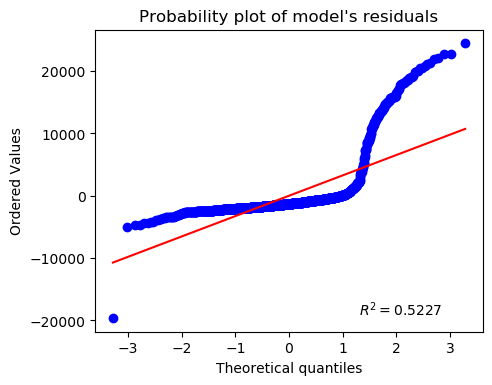

In [50]:
fig = plt.figure(figsize= (5, 4))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(lm_model2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model's residuals", fontsize= 12)
ax.set

plt.show()

We can see that the residuals are not normally distributed as the null hypothesis is rejected. Thus, we have sufficient evidence to say that this data has skewness and kurtosis that is significantly different from a normal distribution.


**Linearity Assumption**

The plot below is the Residuals vs. Fitted, can be used to check the Linearity assumption. Residuals should be patternless around Y = 0; if not, there is a pattern in the data that is currently unaccounted for.

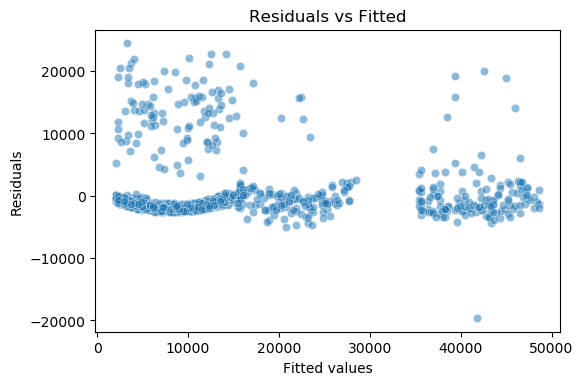

In [51]:
sns.scatterplot(x= lm_model2.fittedvalues, y= lm_model2.resid,alpha=0.5)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residuals vs Fitted');

There is an unusual pattern from our *Residuals vs Fitted* plot. It seems that these samples are caused by outliers. Outliers can have a big influence on the fit of the regression line. Moreover, it may be that we have overlooked some entirely different independent variable that explains or corrects for the pattern or interactions among variables that we have not considered in our data. Another possibility is that there are two or more subsets of the data having different statistical properties, in which case separate models should be built, or else some data should merely be excluded, provided that there is some a priori criterion that can be applied to make this determination.

Since our model violates linearity and normality assumptions, the results from a our linear model are not trustworthy. However,  we can improve our model by applying some non-linear transformation or adding more samples like smokers in our data.

## 4.2 Predictive Models

We further extend our study using a Random Forest and Gradient Boosting to predict medical charges. The advantage of using these models is that no assumption is made about the data, whereas the parameters of parametric models like *linear regression* control the mechanism that is assumed to have produced the data.

As part of our algorithm, we performed random sampling technique `Cross Validation ShuffleSplit` from sklearn to ensure that results obtained from our sample would approximate what would have been obtained if the entire samples had been measured. This allows all the units in the data to have an equal chance of being selected.

ShuffleSplit will randomly sample our entire dataset during each iteration to generate a training set and a test set. The `test_size` and `n_splits` parameters control how large the test data for each iteration and the number of re-shuffling, respectively. Since we are sampling from the entire dataset during each iteration, values selected during one iteration, could be selected again during another iteration. In our model, we choose a test_size = 0.20 and n_splits=5.


#### Using the best parameters using GridSearchCV

In [52]:
def plot_feature_importance(abs_coefs, feature_names, target_name):
    
    coefs_count = len(abs_coefs)
    fig, ax = plt.subplots(figsize=(5,4))
    ax.barh(np.arange(coefs_count), sorted(abs_coefs))

    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(abs_coefs)])
    ax.set_title('List of Important Features with weights for target='
                 +target_name)
    
    
def pipeline_modeling(X_train, y_train, X_val, y_val, X_test, y_test,
             model, parameters=None, target_name='charges'):
    
    scores = {'model_name': str(model)[:-2],
             'opt_hyperparameter': None,
             'val_score': None,
             'train_score': None,
             'test_score': None,
             'run_time':None}
    
    shuffle_split = ShuffleSplit(n_splits=5, test_size=.20)
    grid_obj = GridSearchCV(model,
                            parameters, n_jobs=-1, 
                            cv=shuffle_split,
                            return_train_score=True)
    
    
    start_time = time.time()
    grid_obj = grid_obj.fit(X_val, y_val)
    results_df = pd.DataFrame(grid_obj.cv_results_)
    results_df = (
        results_df
        .set_index(results_df["params"].apply(
            lambda x: "_".join(str(val) for val in x.values()))
        ))
    best_model = grid_obj.best_estimator_

    # fit best model on train data
    best_model.fit(X_train, y_train)

    # get accuracy scores
    scores['val_score'] = round(grid_obj.best_score_, 4)
    scores['train_score'] = round(best_model.score(X_train, y_train),4)
    scores['test_score'] = round(best_model.score(X_test, y_test),4)
    run_time = (time.time() - start_time)
    scores['run_time'] = run_time
    
    model = str(model)[:-2]
    feature_names = X_train.columns
    if model in ['RandomForestRegressor', 'DecisionTreeRegressor',
                     'GradientBoostingRegressor']:
        
        coefs = best_model.feature_importances_
        top_predictor = feature_names[np.argmax(np.abs(coefs))]
        plot_feature_importance(np.abs(coefs), feature_names, target_name)
        
    elif model in ['LinearRegression', 'Ridge', 'Lasso']:
        coefs = best_model.coef_
        plot_feature_importance(np.abs(coefs), feature_names, target_name)
        top_predictor = feature_names[np.argmax(np.abs(coefs))]

    else: #if knn
        top_predictor = None
        
    scores['opt_hyperparameter'] = str(best_model)
    scores['top_predictor'] = top_predictor
    scores['target'] = target_name
    
    return scores, results_df


### Split the dataset

In [53]:
features = ['age', 'bmi', 'num_children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']

X = df_cleaned[features]
y = df_cleaned['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                            test_size=0.15, random_state=1)
X_train.shape, X_val.shape, X_test.shape

((909, 8), (161, 8), (268, 8))

#### 1. Random Forest

,model_name,opt_hyperparameter,val_score,train_score,test_score,run_time,top_predictor,target
0,RandomForestRegressor,"RandomForestRegressor(max_depth=3, n_estimator...",0.8001,0.8682,0.8694,6.51597,smoker_yes,charges


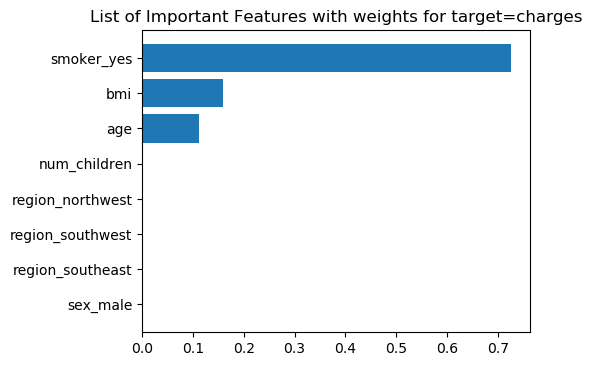

In [54]:
parameters = {'max_depth': [2, 3, 4], # 5, 6,],
              'n_estimators': [50, 75, 100, 200]
             } 
model = RandomForestRegressor()
scores_dict, cv_rf = pipeline_modeling(X_train, y_train, X_val, y_val,
                                       X_test, y_test,
                                    model, parameters, target_name = y.name)
df_rf = pd.DataFrame(scores_dict, index=[0])
df_rf

#### 2. Gradient Boosting

,model_name,opt_hyperparameter,val_score,train_score,test_score,run_time,top_predictor,target
0,GradientBoostingRegressor,"GradientBoostingRegressor(max_depth=2, n_estim...",0.7465,0.8765,0.8721,1.83428,smoker_yes,charges


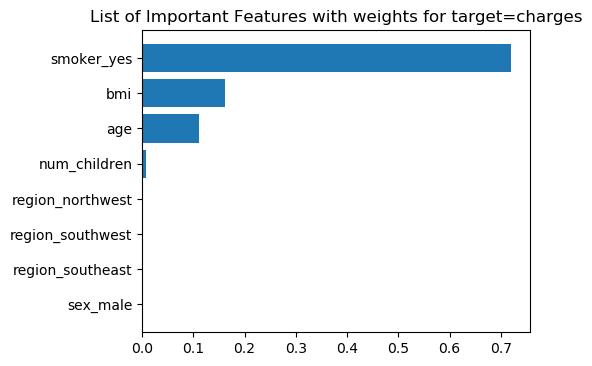

In [55]:
parameters = {'max_depth': [2, 3, 4, 5],
              'n_estimators': [50, 75, 100, 150],
              }

model = GradientBoostingRegressor()

scores_dict, cv_gb = pipeline_modeling(X_train, y_train, X_val, y_val, X_test,
                                       y_test, model, parameters,
                                       target_name=y.name)
   
df_gb = pd.DataFrame(scores_dict, index=[0])
df_gb

In [56]:
# concatenate the 2 models
df_models = pd.concat([df_rf, df_gb]).reset_index(drop=True)
df_models = df_models.sort_values(by='test_score', ascending=False).reset_index(drop=True)
df_models

,model_name,opt_hyperparameter,val_score,train_score,test_score,run_time,top_predictor,target
0,GradientBoostingRegressor,"GradientBoostingRegressor(max_depth=2, n_estim...",0.7465,0.8765,0.8721,1.83428,smoker_yes,charges
1,RandomForestRegressor,"RandomForestRegressor(max_depth=3, n_estimator...",0.8001,0.8682,0.8694,6.51597,smoker_yes,charges


**Insights**

Gradient Boosting is the best model for this case with test accuracy of ~88%. The best predictor for gradient boosting is the feature `smoker_yes` which is a flag if the individual smokes. 

Both models performed good because they can handle the complexity of the data. The important features of our best model Gradient Boosting is shown above. Important features include `smoker_yes`, `bmi`, `age` and `num_children`. The contributions of the individual's location (region) and sex are equal to zero. From our statistical analysis in section $3.3$, these features have also no impact on our R-squared.

# 5. Conclusion and Recommendations

Based on multiple hypothesis testing methods used, the group has determined that the top factors that affect the value of an insurance claim are age, bmi, being a smoker, and a number of children.

The main hypothesis testing methods explored in this study are Chi Square test, Mann-Whitney U test, Kruskal-Wallis, and Friedman's Tests. We used nonparametric tests for our case because our data violates the homogeneity of variance assumption.
Bartlett's Test is used if the level of variance for a particular variable is constant across the samples.

**Recommendation**

As the study surfaced the factors affecting the value of an insurance claim, namely age, bmi, being a smoker, and number of children, the team recommends the following next steps for the identified proponents:

Insurance companies and the insurance industry - with the key factors identified, the companies can include these factors as key indicators when calculating the insurance premium of a certain patient or customer. This way, insurance companies would be able to optimize their insurance premiums and make them more specific based on the customer profile.

In relation to optimizing the insurance premiums, the customers would be able to choose the right healthcare insurance coverage fit for their needs based on their profile. Some controllable factors such as smoking and bmi can be a motivation for the patients to lose weight or stop smoking if they would prefer to have a lower premium for their selected insurance coverage.

**Recommendation: Prediction based on Machine Learning Models**

Combining the results of the study and machine learning models, the team recommends exploring other models such as CatBoost and SVM as a means for the insurance companies to predict the value of claims (and by extension, insurance premiums). 

**Recommendation: Improving the Study**

To further improve the study, the team recommends gathering more information and features about the patient so the models can capture the more qualities that might have been missed by the limitations of the study. The team recommends looking into details such as comorbidities, income, and family medical history, among others. Having these features would give more texture when running the models and hence could surface accurate results and forecasts.

# 6. References

[1] How Your Insurance Premiums Are Calculated. (n.d.). Investopedia. Retrieved September 16, 2021, from https://www.investopedia.com/ask/answers/09/calculating-premium.asp

[2] What Everyone Should Know About Insurance. (n.d.). Investopedia. Retrieved September 16, 2021, from https://www.investopedia.com/terms/i/insurance.asp

[3] What Is an Insurance Premium? (n.d.). Investopedia. Retrieved September 16, 2021, from https://www.investopedia.com/terms/i/insurance-premium.asp


[4] Higgins ST, Kurti AN, Redner R, et al. A literature review on prevalence of gender differences and intersections with other vulnerabilities to tobacco use in the United States, 2004-2014. Prev Med. 2015;80:89-100. doi:10.1016/j.ypmed.2015.06.009.


[5] Istvan JA, Cunningham TW, Garfinkel L. Cigarette smoking and body weight in the Cancer Prevention Study I. Int J Epidemiol. 1992;21(5):849–53.

 
[6] StackExchange.com (2012, October 13). Mann-Whitney U test with unequal sample sizes. Available from: https://stats.stackexchange.com/questions/40342/mann-whitney-u-test-with-unequal-sample-sizes

 

[7] Statisticshowto.com (2021, May 25). Kruskal Wallis H Test: Definition, Examples & Assumptions. Available from: https://www.statisticshowto.com/kruskal-wallis/

 

[8] Laerd Statistics (n.d.). Friedman Test in SPSS Statistics. Available from: https://statistics.laerd.com/spss-tutorials/friedman-test-using-spss-statistics.php

 

[9] Yale University (n.d.). Linear Regression. Available from: http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm